In [1]:
import requests, six
import lxml.html as lh
from itertools import cycle, islice
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://pokemondb.net/pokedex/all"

In [3]:
pagina = requests.get(url)

doc = lh.fromstring(pagina.content)

elementos_tr = doc.xpath('//tr')


# Checando o numero das primeiras 12 linhas
[len(TR) for TR in elementos_tr[:12]]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

#### A table contém 10 dez colunas, foi possivel verificar ao olhar o numero de colunas das primeiras doze linhas
#### O proxímo passo é analisar a primeira linha, que no caso é o cabeçalho da tabela

In [4]:
elementos_tr = doc.xpath('//tr')

colunas = []
i = 0

# Armazenando  em uma lista vazia cada elemento que vem primeiro
for tr in elementos_tr[0]:
    i+=1
    nome = tr.text_content()
    print('%d: "%s"' %(i, nome))
    colunas.append((nome, []))

1: "#"
2: "Name"
3: "Type"
4: "Total"
5: "HP"
6: "Attack"
7: "Defense"
8: "Sp. Atk"
9: "Sp. Def"
10: "Speed"


In [5]:
# Os dados do cabeçalho é anexado a uma tupa com o segundo indice sendo umas lista vazia
# Essas listas vazias serão preenchidas com os dados correspondentes
colunas 

[('#', []),
 ('Name', []),
 ('Type', []),
 ('Total', []),
 ('HP', []),
 ('Attack', []),
 ('Defense', []),
 ('Sp. Atk', []),
 ('Sp. Def', []),
 ('Speed', [])]

In [6]:
for j in range(1, len(elementos_tr)):
    T = elementos_tr[j]
    
    if len(T) != 10: # Caso os elementos tr ultrapassem o tamanho 10, então não fazem parte da nossa tabela
        break
        
    i = 0
    
    for t in T.iterchildren():
        data = t.text_content()
        # Verifica se a linha vazia
        if i > 0:
            # Convertendo quaisquer numeros para inteiro
            try:
                data = int(data)
            except:
                pass
                
         # Adicionando os dados na lista vazia vazia
        colunas[i][1].append(data)
        # Incrementa para a proxima coluna
        i+=1
    

In [7]:
# Verificando que o comprimento de cada coluna. Felizmente são do mesmo tamanho
[len(C) for (title,C) in colunas]

[919, 919, 919, 919, 919, 919, 919, 919, 919, 919]

#### Proximo passo é construir nosso DataFrame usando Pandas.

In [8]:
Dicionario = {title:column for (title,column) in colunas}
df = pd.DataFrame(Dicionario)

In [9]:
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
1,002,Ivysaur,GrassPoison,405,60,62,63,80,80,60
2,003,Venusaur,GrassPoison,525,80,82,83,100,100,80
3,003,VenusaurMega Venusaur,GrassPoison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65


Limpando os dados
DataFrame foi criado, porém a seção "Nome" e "Tipo" estão desorganizada,
o proximo passo irá ser reformatar as duas seções

In [10]:
def str_bracket(palavra):
    '''Adicionando parentes em torno do segundo termo '''
    list = [x for x in palavra]
    for char_ind in range(1,len(list)):
        if list[char_ind].isupper():
            list[char_ind] = ' ' + list[char_ind]
    fin_list = ''.join(list).split(' ')
    lenght = len(fin_list)
    if lenght > 1:
        fin_list.insert(1,'(')
        fin_list.append(')')
    return ' '.join(fin_list)

def str_break(palavra):
    '''Divindo a string que começam com letra maiúscula'''
    list = [x for x in palavra]
    for char_ind in range(1,len(list)):
        if list[char_ind].isupper():
            list[char_ind] = ' ' + list[char_ind]
    fin_list = ''.join(list).split(' ')
    return fin_list
        

In [11]:
palavra = "MarcosStark"
print(str_bracket(palavra))
print(str_break(palavra))

Marcos ( Stark )
['Marcos', 'Stark']


Aplicando os metodos no dataframe...

In [12]:
df['Name'] = df['Name'].apply(str_bracket)
df['Type'] = df['Type'].apply(str_break)
df.head(10)

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
1,002,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
2,003,Venusaur,"[Grass, Poison]",525,80,82,83,100,100,80
3,003,Venusaur ( Mega Venusaur ),"[Grass, Poison]",625,80,100,123,122,120,80
4,004,Charmander,[Fire],309,39,52,43,60,50,65
5,005,Charmeleon,[Fire],405,58,64,58,80,65,80
6,006,Charizard,"[Fire, Flying]",534,78,84,78,109,85,100
7,006,Charizard ( Mega Charizard X ),"[Fire, Dragon]",634,78,130,111,130,85,100
8,006,Charizard ( Mega Charizard Y ),"[Fire, Flying]",634,78,104,78,159,115,100
9,007,Squirtle,[Water],314,44,48,65,50,64,43


### Armazenamento de dados
Agora que temos o Data Frame totalmente limpo, devemos fazer o backup dos dados.
Será utilizado um arquivo JSON para armazenamento

In [13]:
df.to_json('PokemonData.json')

In [2]:
import pandas as pd
# Verificando se os dados foram salvos corretamente
# Vamos abrir o arquivo Json e verificar
df = pd.read_json('PokemonData.json')
Dicionario = df
df = df.set_index(['#'])
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
2,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
8,Wartortle,[Water],405,59,63,80,65,80,58
80,Slowbro,"[Water, Psychic]",490,95,75,110,100,80,30
80,Slowbro ( Mega Slowbro ),"[Water, Psychic]",590,95,75,180,130,80,30


## Análise Estatística
Com o Data Frame, é hora de fazer algumas análises.
Vamos encontrar o melhor e o pior Pokemon para cada "stat"

In [3]:
def max_stat_pokemon(df, lista_coluna):
    ''' Pega os pokemons com maior valor da coluna do Data Frame'''
    mensagem = ''
    for coluna in lista_coluna:
        stat = df[coluna].max()
        nome = df[df[coluna]==df[coluna].max()]['Name'].values[0]
        mensagem += nome+' tem o maior valor '+coluna+' de '+str(stat)+'\n'
    return mensagem

def min_stat_pokemon(df, lista_coluna):
    ''' Pega os pokemons com menor valor da coluna do Data Frame'''
    mensagem = ''
    for coluna in lista_coluna:
        stat = df[coluna].min()
        nome = df[df[coluna]==df[coluna].min()]['Name'].values[0]
        mensagem += nome+' tem o maior valor '+coluna+' de '+str(stat)+'\n'
    return mensagem


In [4]:
stats = ['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def','Speed','Total']

print(max_stat_pokemon(df, stats))

print(min_stat_pokemon(df, stats))

Mewtwo ( Mega  Mewtwo  X ) tem o maior valor Attack de 190
Steelix ( Mega  Steelix ) tem o maior valor Defense de 230
Blissey tem o maior valor HP de 255
Mewtwo ( Mega  Mewtwo  Y ) tem o maior valor Sp. Atk de 194
Shuckle tem o maior valor Sp. Def de 230
Deoxys ( Speed  Forme ) tem o maior valor Speed de 180
Mewtwo ( Mega  Mewtwo  X ) tem o maior valor Total de 780

Chansey tem o maior valor Attack de 5
Chansey tem o maior valor Defense de 5
Shedinja tem o maior valor HP de 1
Shuckle tem o maior valor Sp. Atk de 10
Caterpie tem o maior valor Sp. Def de 20
Shuckle tem o maior valor Speed de 5
Wishiwashi ( Solo  Form ) tem o maior valor Total de 175



Como de costume, Mewtwo assume a lideranças em várias categorias

Em seguida, será explorado se existe uma correlação estátistica entre qualquer uma
dessa estásticas.
Para isso , será usada uma matriz de dispersão

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000102DDBA8>,
      dtype=object)

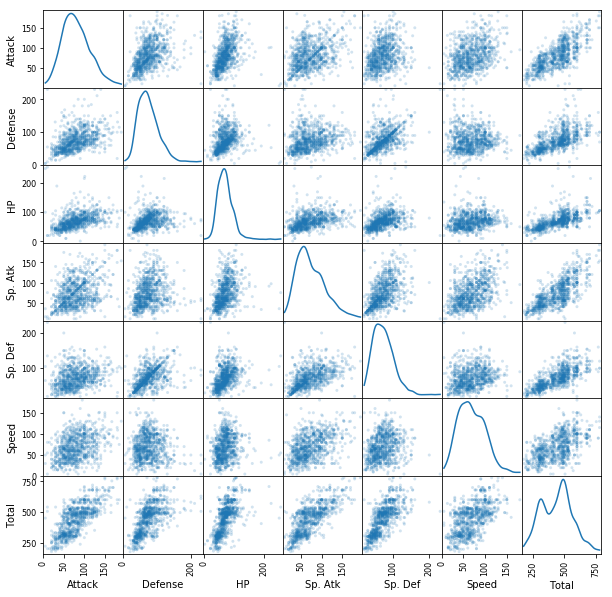

In [17]:
#from pandas.tools.plotting import scatter_matrix Não funciona
from pandas.plotting import scatter_matrix

scatter_matrix(df[stats], alpha=0.2, figsize=(10,10), diagonal='kde')

Apesar de muita informação, é possivel verificar que o total é está correlacionado com tudo, portanto, pode ser 
retirado da matriz

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F6724E0>,
      dtype=object)

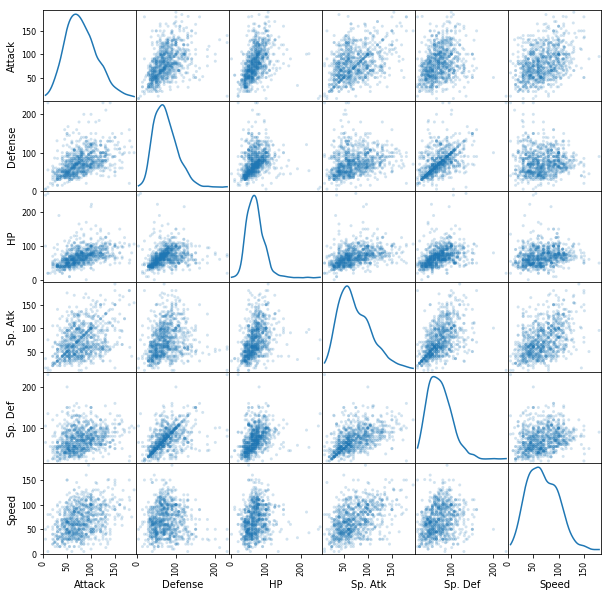

In [18]:
#Total é o último elemento de estatísticas e, portanto, retirado da matriz de dispersão
scatter_matrix(df[stats[:-1]], alpha=0.2, figsize=(10,10), diagonal='kde')

Parece haver alguma correlação positiva entre defesa e ataque especial.
Outras estatísticas também têm alguma correlação, mas os valores R² são muito baixos

Agora, que vimos as informações sobre habilidades, vamos aprofundar ainda mais.
A próxima análise, será mostrada o efeito do tipo Pokémon nas habilidades


In [9]:
#Creating new Data Frame where the Type values are separated from the list
novo_dicionario={}
colunas_stats=["#","Name","Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]

#Collecting the list of Type for each Pokemon
Dicionario['Type']=df['Type'].values

#Creating an empty list for each key (column)
for coluna in colunas_stats:
    novo_dicionario[coluna]=[]
    novo_dicionario['Type']=[]

#Populating each the dictionary value (empty list) with data 
for linha in range(len(Dicionario['#'])):
    for t in Dicionario['Type'][linha]:
        for coluna in colunas_stats:
            #Append all columns except Type to the new dictionary
            novo_dicionario[coluna].append(Dicionario[coluna][linha])
        #Appending the Type separately for each Pokemon  in the new dictionary
        novo_dicionario['Type'].append(t)
        
#Convert dictionary to a Data Frame
new_df = pd.DataFrame(novo_dicionario)

In [10]:
tipos=new_df['Type'].unique()
print(tipos)

['Grass' 'Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Dark'
 'Electric' 'Psychic' 'Ground' 'Ice' 'Steel' 'Fairy' 'Fighting' 'Rock'
 'Ghost']


In [11]:
#Colours to cycle through when plotting the hbar graph
minhas_cores = list(six.iteritems(colors.cnames))
minhas_cores = list(islice(cycle(minhas_cores), None, len(new_df)))

def barh_stats():
    '''Plot hbar of mean and std. of each attribute of Pokemon Type'''
    i=0
    plt.figure(figsize=(15,5))
    plt.suptitle('Statistics', fontsize=15)
    
    
    #Cycle through each pokemon Type
    for t in tipos:
        
        #Iterate i value to change colour to my_colors[i]
        i+=1   
        
        #Plotting Mean
        plt.subplot(121)
        plt.title('Mean')
        new_df[new_df['Type']==t].mean().plot(kind='barh', color=minhas_cores[i])
        
        #Plotting Standard Deviation
        plt.subplot(122)
        plt.title('Standard Deviation')
        new_df[new_df['Type']==t].std().plot(kind='barh', color=minhas_cores[i])
    
    #Add list of Pokemon Type to legend
    plt.legend(tipos,bbox_to_anchor=(1.3, 1.1))

C:\Users\Marcos\PycharmProjects\data-science\venv\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


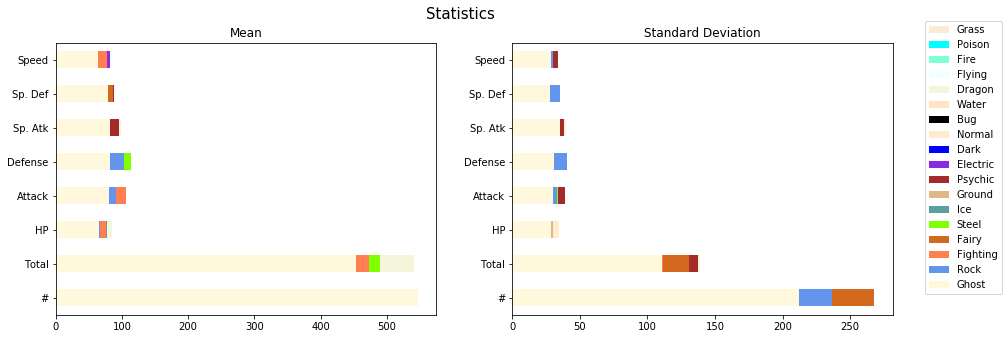

In [12]:
barh_stats()

In [26]:
import pandas as pd
import sys
from urllib.request import Request, urlopen
import requests
from PyQt5 import QtWidgets, QtCore, QtGui

class PokeDex(QtWidgets.QWidget):
    
    def __init__(self):
        super(PokeDex, self).__init__()
        
        self.initUI()
        
    def initUI(self):
        '''Initial UI'''
        
        #Grid Layout
        self.grid = QtWidgets.QGridLayout()
        self.setLayout(self.grid)
        
        #Parse JSON for DataFrame
        self.df = pd.read_json('PokemonData.json')
        self.df = self.df.set_index(['#'])
        
        #Drop Down
        self.dropdown = QtWidgets.QComboBox(self)
        self.names = self.df['Name'].values
        self.dropdown.addItems(self.names)
        self.grid.addWidget(self.dropdown, 0,0,1,1)
        
        #Search Button
        self.btn = QtWidgets.QPushButton('Search', self)
        self.btn.clicked.connect(self.runSearch)      
        self.grid.addWidget(self.btn, 0,1,1,1)
        
        #Image
        self.img = QtWidgets.QLabel(self)
        self.grid.addWidget(self.img, 1,1,1,1)
        
        #Data
        self.label = QtWidgets.QLabel(self)
        self.label.setAlignment(QtCore.Qt.AlignCenter)
        self.label.setText('\nName:\n\nType:\n\nHP:\n\nAttack\n\nSp. Attack\n\n Defense:\n\nSp. Defense:\n\nSpeed:\n\nTotal:')
        self.label.setAlignment(QtCore.Qt.AlignLeft)
        self.grid.addWidget(self.label, 1,0,1,1)
        
        #Customize Widgets
        self.resize(500, 250)
        self.center()
        self.setWindowTitle('PokeDex')    
        self.show()
        
    def runSearch(self):
        '''Event for run button'''
        
        #Parse value
        index = self.dropdown.currentIndex()
        val= self.names[index]
        cond = self.df['Name']== val
        
        #Image
        base = 'http://img.pokemondb.net/artwork/'
        
        #headers... Para não dar erro 403
        img_url = Request(base + val.lower() + '.jpg', headers={'User-Agent': 'Mozilla/5.0'})
        
        data = urlopen(img_url).read()
        image = QtGui.QImage()
        image.loadFromData(data)
        self.img.setPixmap(QtGui.QPixmap(image))
        
        #Set values
        name = 'Name:\t\t\t'+val+'\n\n'
        ty = 'Type:\t\t\t'+ ', '.join(self.df[cond]['Type'].values[0])+'\n\n'
        hp = 'HP:\t\t\t'+ str(self.df[cond]['HP'].values[0])+'\n\n'
        atk = 'Attack:\t\t\t'+str(self.df[cond]['Attack'].values[0])+'\n\n'
        satk = 'Sp. Attack:\t\t'+str(self.df[cond]['Sp. Atk'].values[0])+'\n\n'
        deff = 'Defense:\t\t\t'+str(self.df[cond]['Defense'].values[0])+'\n\n'
        sdef = 'Sp. Defense:\t\t'+str(self.df[cond]['Sp. Def'].values[0])+'\n\n'
        speed = 'Speed:\t\t\t'+str(self.df[cond]['Speed'].values[0])+'\n\n'
        total = 'Total:\t\t\t'+str(self.df[cond]['Total'].values[0])+'\n\n'
        
        #Add text
        final = name+ty+hp+atk+satk+deff+sdef+speed+total
        self.label.setText(final)
        
    def center(self):
        '''Center Widget on screen'''
        qr = self.frameGeometry()
        cp = QtWidgets.QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())
        
        
def main():
    '''Codes for running GUI'''
    
    #Create Application object to run GUI
    app = QtWidgets.QApplication(sys.argv)
    app.aboutToQuit.connect(app.deleteLater)
    
    #Run GUI
    gui = PokeDex()
    #Exit cleanly when closing GUI
    sys.exit(app.exec_())


if __name__ == '__main__':
    main()

SystemExit: 0

C:\Users\Marcos\PycharmProjects\data-science\venv\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
